In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-04-22.csv")
df = pd.read_csv("data/inc/data-inc-2024-04-29.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105783 entries, 0 to 105782
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        105783 non-null  int64  
 1   id_mls                    105783 non-null  object 
 2   bathrooms_total           105783 non-null  float64
 3   bedrooms_extra            105783 non-null  float64
 4   bedrooms                  105783 non-null  float64
 5   stories_total             105783 non-null  float64
 6   size_interior             105783 non-null  float64
 7   building_type             105783 non-null  object 
 8   agency_name               105783 non-null  object 
 9   agency_type               105783 non-null  object 
 10  property_type             105783 non-null  object 
 11  lng                       105783 non-null  float64
 12  lat                       105783 non-null  float64
 13  ownership_type            105783 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26812899,24009790,1,3 + 0,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.292637,Freehold,1,35X233,0,https://realtor.ca/real-estate/26812899/1615-c...,638499928468370000,N9B3N7,Ontario,299999.0
1,26812579,24009765,2,3 + 2,1.0,NaN,House,JUMP REALTY INC.,Firm,Single Family,...,42.301384,Freehold,1,30X123.5,0,https://realtor.ca/real-estate/26812579/450-cl...,638499628222870000,N8X1A8,Ontario,499800.0
2,26812578,24009780,2,3 + 0,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.186587,Freehold,1,80X200,0,https://realtor.ca/real-estate/26812578/9542-m...,638499628219030000,N9J2W2,Ontario,599900.0
3,26811144,24009718,2,3 + 0,NaN,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
4,26810794,24009756,2,2 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,Single Family,...,42.307084,Condominium/Strata,2,0X0.00,0,https://realtor.ca/real-estate/26810794/3000-s...,638498314741070000,N9C4G3,Ontario,249900.0


In [5]:
df.shape

(24713, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24713 entries, 0 to 24712
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24713 non-null  int64  
 1   id_mls                    24713 non-null  object 
 2   bathrooms_total           24713 non-null  int64  
 3   bedrooms                  24713 non-null  object 
 4   stories_total             15870 non-null  float64
 5   size_interior             12986 non-null  object 
 6   building_type             24713 non-null  object 
 7   agency_name               24713 non-null  object 
 8   agency_type               24713 non-null  object 
 9   property_type             24713 non-null  object 
 10  lng                       24713 non-null  float64
 11  lat                       24713 non-null  float64
 12  ownership_type            24713 non-null  object 
 13  ownership_type_group_ids  24713 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,26811144,24009718,2,3 + 0,NaN,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
8,26808741,40578441,2,2 + 0,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,Single Family,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26808741/6156-t...,638497631610800000,N9J3Y7,Ontario,699000.0
15,26807382,24009731,2,2 + 0,NaN,1118.0000,Apartment,HOMELIFE GOLD STAR REALTY INC,Firm,Single Family,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26807382/2550-s...,638497516515400000,N9H2R6,Ontario,499900.0
16,26806626,24009717,3,4 + 0,2.0,2300.0000,House,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.225373,Freehold,1,45X128,0,https://realtor.ca/real-estate/26806626/4532-v...,638497480570070000,N9H0N1,Ontario,1079000.0
37,26801431,24009637,4,4 + 0,2.0,4000.0000,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.223486,Freehold,1,81.96X,0,https://realtor.ca/real-estate/26801431/4985-t...,638496652544400000,N9J3P1,Ontario,1599999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24707,26795484,5771,2,5,NaN,1983 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.441659,none,none,7071,0,https://realtor.ca/real-estate/26795484/5056-f...,638495799309170000,X1A3P4,Northwest Territories,699900.0
24708,26794196,5769,2,2,NaN,930 sqft,Apartment,COLDWELL BANKER NBS,Firm,Single Family,...,62.440705,Condominium/Strata,2,930,0,https://realtor.ca/real-estate/26794196/201-62...,638495704476170000,NaN,Northwest Territories,315000.0
24709,26790881,5768,2,3,NaN,1327 sqft,Row / Townhouse,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.448756,none,none,NaN,0,https://realtor.ca/real-estate/26790881/31-war...,638495030630570000,NaN,Northwest Territories,379900.0
24710,26781967,5767,3,3,NaN,1112 sqft,Row / Townhouse,RE/MAX North of 60,Firm,Single Family,...,62.441619,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26781967/35-705...,638493828953270000,X1A3W9,Northwest Territories,429900.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4135
Ontario                    3278
Alberta                    2475
Quebec                     1487
Manitoba                    575
Saskatchewan                546
New Brunswick               325
Newfoundland & Labrador     133
Yukon                        20
Northwest Territories        12
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    11347
British Columbia            4471
Quebec                      3571
Alberta                     2695
Manitoba                     639
Saskatchewan                 632
Nova Scotia                  566
New Brunswick                446
Newfoundland & Labrador      171
Prince Edward Island         140
Yukon                         23
Northwest Territories         12
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,24713.0,24713.0,15870.0,24713.0,24713.0,24713.0,2.471300e+04,24713.0
mean,26797337.0,2.0,2.0,-90.0,47.0,2.0,6.384961e+17,878017.0
std,9039.0,1.0,3.0,20.0,3.0,4.0,1.462501e+12,1088779.0
min,26781262.0,0.0,0.0,-139.0,42.0,0.0,6.384932e+17,1.0
25%,26789614.0,1.0,1.0,-114.0,44.0,0.0,6.384949e+17,424999.0
50%,26797479.0,2.0,2.0,-80.0,46.0,1.0,6.384960e+17,674900.0
75%,26805105.0,3.0,2.0,-78.0,49.0,4.0,6.384973e+17,999900.0
max,26813050.0,36.0,80.0,-53.0,64.0,250.0,6.384999e+17,84900000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

24706

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

14


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7288,26782829,C8258214,3,4 + 1,2.0,NaN,House,BAY STREET GROUP INC.,Firm,Single Family,...,43.772753,Freehold,1,40 x 140 FT,6,https://realtor.ca/real-estate/26782829/338-wi...,638493964198530000,M2N5A2,Ontario,1699900.0
7290,26782829,C8258214,3,4 + 1,2.0,NaN,House,BAY STREET GROUP INC.,Firm,Single Family,...,43.772753,Freehold,1,40 x 140 FT,6,https://realtor.ca/real-estate/26782829/338-wi...,638493964198530000,M2N5A2,Ontario,1699900.0
17399,26791997,R2874418,2,2,NaN,927 sqft,Apartment,Oakwyn Realty Ltd.,Firm,Single Family,...,49.207321,Strata,2,0,2,https://realtor.ca/real-estate/26791997/204-84...,638495131239500000,V5S4S7,British Columbia,719900.0
17400,26791997,R2874418,2,2,NaN,927 sqft,Apartment,Oakwyn Realty Ltd.,Firm,Single Family,...,49.207321,Strata,2,0,2,https://realtor.ca/real-estate/26791997/204-84...,638495131239500000,V5S4S7,British Columbia,719900.0
23871,26792722,E4383577,2,2,NaN,80.75 m2,Apartment,Liv Real Estate,Firm,Single Family,...,53.556282,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26792722/1205-2...,638495308308230000,T8H0X8,Alberta,250000.0
23872,26792722,E4383577,2,2,NaN,80.75 m2,Apartment,Liv Real Estate,Firm,Single Family,...,53.556282,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26792722/1205-2...,638495308308230000,T8H0X8,Alberta,250000.0
5289,26796717,C8267798,1,1,NaN,NaN,Apartment,RE/MAX HALLMARK REALTY LTD.,Firm,Single Family,...,43.713663,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26796717/817-33...,638495906342900000,M4G0C9,Ontario,650000.0
5292,26796717,C8267798,1,1,NaN,NaN,Apartment,RE/MAX HALLMARK REALTY LTD.,Firm,Single Family,...,43.713663,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26796717/817-33...,638495906342900000,M4G0C9,Ontario,650000.0
23670,26800479,E4383819,4,4,2.0,187.47 m2,House,RE/MAX River City,Firm,Single Family,...,53.560353,Freehold,1,531.22 m2,4,https://realtor.ca/real-estate/26800479/57-viv...,638496604239030000,T7X0H3,Alberta,525000.0
23672,26800479,E4383819,4,4,2.0,187.47 m2,House,RE/MAX River City,Firm,Single Family,...,53.560353,Freehold,1,531.22 m2,4,https://realtor.ca/real-estate/26800479/57-viv...,638496604239030000,T7X0H3,Alberta,525000.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
7290,26782829,C8258214,3,4 + 1,2.0,NaN,House,BAY STREET GROUP INC.,Firm,Single Family,...,43.772753,Freehold,1,40 x 140 FT,6,https://realtor.ca/real-estate/26782829/338-wi...,638493964198530000,M2N5A2,Ontario,1699900.0
17400,26791997,R2874418,2,2,NaN,927 sqft,Apartment,Oakwyn Realty Ltd.,Firm,Single Family,...,49.207321,Strata,2,0,2,https://realtor.ca/real-estate/26791997/204-84...,638495131239500000,V5S4S7,British Columbia,719900.0
23872,26792722,E4383577,2,2,NaN,80.75 m2,Apartment,Liv Real Estate,Firm,Single Family,...,53.556282,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26792722/1205-2...,638495308308230000,T8H0X8,Alberta,250000.0
5292,26796717,C8267798,1,1,NaN,NaN,Apartment,RE/MAX HALLMARK REALTY LTD.,Firm,Single Family,...,43.713663,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26796717/817-33...,638495906342900000,M4G0C9,Ontario,650000.0
23672,26800479,E4383819,4,4,2.0,187.47 m2,House,RE/MAX River City,Firm,Single Family,...,53.560353,Freehold,1,531.22 m2,4,https://realtor.ca/real-estate/26800479/57-viv...,638496604239030000,T7X0H3,Alberta,525000.0
12108,26809212,11699935,1,2,3.0,971.98 sqft,Apartment,RE/MAX CRYSTAL - St-Eustache,Firm,Single Family,...,45.806002,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26809212/2291-r...,638497664176470000,J7Y5H8,Quebec,285000.0
3090,26810425,W8276664,5,4 + 2,2.0,NaN,House,AIMHOME REALTY INC.,Firm,Single Family,...,43.530722,Freehold,1,62.5 x 120 FT,6,https://realtor.ca/real-estate/26810425/1694-w...,638498160027770000,L5J4G3,Ontario,1885000.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(24699, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24699 entries, 0 to 24712
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24699 non-null  int64  
 1   id_mls                    24699 non-null  object 
 2   bathrooms_total           24699 non-null  int64  
 3   bedrooms                  24699 non-null  object 
 4   stories_total             15862 non-null  float64
 5   size_interior             12978 non-null  object 
 6   building_type             24699 non-null  object 
 7   agency_name               24699 non-null  object 
 8   agency_type               24699 non-null  object 
 9   property_type             24699 non-null  object 
 10  lng                       24699 non-null  float64
 11  lat                       24699 non-null  float64
 12  ownership_type            24699 non-null  object 
 13  ownership_type_group_ids  24699 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  13839
none                       3988
Condominium/Strata         3980
Strata                     1894
Condominium                 545
Leasehold                   164
Freehold Condo               99
Undivided Co-ownership       49
Leasehold Condo/Strata       42
Timeshare/Fractional         23
Shares in Co-operative       22
Other, See Remarks           19
Leasehold/Leased Land        15
Unknown                      13
Life Lease                    5
Cooperative                   2
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                       13738
Apartment                    4663
Row / Townhouse              2444
none                         1970
Duplex                        672
Triplex                       172
Multi-Family                  157
Mobile Home                   150
No Building                   124
Other                         108
Fourplex                      103
Unknown                        99
Recreational                   98
Manufactured Home              83
Manufactured Home/Mobile       72
Parking                        15
Modular                        14
Two Apartment House            12
Commercial Mix                  5
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold              60
Strata                22
none                  20
Condominium/Strata     5
Freehold Condo         1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    22214
Vacant Land       1830
Multi-family       421
Agriculture        140
Recreational        79
Parking             15
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22214 entries, 0 to 24711
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        22214 non-null  int64  
 1   id_mls                    22214 non-null  object 
 2   bathrooms_total           22214 non-null  int64  
 3   bedrooms                  22214 non-null  object 
 4   stories_total             15455 non-null  float64
 5   size_interior             12642 non-null  object 
 6   building_type             22214 non-null  object 
 7   agency_name               22214 non-null  object 
 8   agency_type               22214 non-null  object 
 9   property_type             22214 non-null  object 
 10  lng                       22214 non-null  float64
 11  lat                       22214 non-null  float64
 12  ownership_type            22214 non-null  object 
 13  ownership_type_group_ids  22214 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    10442
British Columbia            4091
Quebec                      3182
Alberta                     2429
Manitoba                     576
Saskatchewan                 541
Nova Scotia                  414
New Brunswick                311
Newfoundland & Labrador      122
Prince Edward Island          76
Yukon                         18
Northwest Territories         12
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       13727
Apartment                    4659
Row / Townhouse              2444
Duplex                        546
none                          244
Mobile Home                   150
Triplex                       136
Manufactured Home              82
Fourplex                       77
Manufactured Home/Mobile       72
Recreational                   36
Modular                        14
Other                          12
Two Apartment House            12
Multi-Family                    3
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  12506
Condominium/Strata         3952
none                       2937
Strata                     1841
Condominium                 545
Leasehold                   155
Freehold Condo               99
Undivided Co-ownership       49
Leasehold Condo/Strata       40
Timeshare/Fractional         22
Shares in Co-operative       20
Other, See Remarks           15
Leasehold/Leased Land        15
Unknown                      11
Life Lease                    5
Cooperative                   2
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
21,26806242,24009712,2,2 + 0,1.0,NaN,Row / Townhouse,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.248501,none,none,0X,0,https://realtor.ca/real-estate/26806242/6156-t...,638497444286630000,N9J3Y7,Ontario,699000.0
121,26787559,24008406,2,2 + 0,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.269997,none,none,38XIRREG,0,https://realtor.ca/real-estate/26787559/664-li...,638494744651000000,N6E3N7,Ontario,849900.0
367,26783165,24008301,1,1 + 0,NaN,NaN,none,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.146970,none,none,0X,0,https://realtor.ca/real-estate/26783165/5-ash-...,638493988730900000,N0R1J0,Ontario,149500.0
498,26807143,X8273942,3,5 + 1,1.0,NaN,Duplex,ROCK STAR REAL ESTATE INC.,Firm,Single Family,...,42.965967,none,none,60 x 130 FT ; 60X130,0,https://realtor.ca/real-estate/26807143/452-ri...,638497495218500000,N6J3H5,Ontario,849900.0
507,26806126,X8273618,2,4,1.0,NaN,Duplex,ROYAL LEPAGE REAL ESTATE SERVICES LTD.,Firm,Single Family,...,42.993669,none,none,46.07 x 147.46 FT,0,https://realtor.ca/real-estate/26806126/435-ch...,638497424952700000,N5W4A5,Ontario,449000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24705,26798623,5772,2,3,NaN,1623 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.432446,none,none,5110,0,https://realtor.ca/real-estate/26798623/222-ha...,638496217450330000,X1A0C6,Northwest Territories,559900.0
24706,26795485,5770,3,4,NaN,1927 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.450438,none,none,5239,0,https://realtor.ca/real-estate/26795485/140-ri...,638495799315000000,X1A3T6,Northwest Territories,679900.0
24707,26795484,5771,2,5,NaN,1983 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.441659,none,none,7071,0,https://realtor.ca/real-estate/26795484/5056-f...,638495799309170000,X1A3P4,Northwest Territories,699900.0
24709,26790881,5768,2,3,NaN,1327 sqft,Row / Townhouse,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.448756,none,none,NaN,0,https://realtor.ca/real-estate/26790881/31-war...,638495030630570000,NaN,Northwest Territories,379900.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

21       https://realtor.ca/real-estate/26806242/6156-t...
121      https://realtor.ca/real-estate/26787559/664-li...
367      https://realtor.ca/real-estate/26783165/5-ash-...
498      https://realtor.ca/real-estate/26807143/452-ri...
507      https://realtor.ca/real-estate/26806126/435-ch...
                               ...                        
24705    https://realtor.ca/real-estate/26798623/222-ha...
24706    https://realtor.ca/real-estate/26795485/140-ri...
24707    https://realtor.ca/real-estate/26795484/5056-f...
24709    https://realtor.ca/real-estate/26790881/31-war...
24711    https://realtor.ca/real-estate/26781966/10-100...
Name: page_url, Length: 2937, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

899      https://realtor.ca/real-estate/26813039/930-la...
1077     https://realtor.ca/real-estate/26808403/10-sha...
1125     https://realtor.ca/real-estate/26795643/14-cop...
1437     https://realtor.ca/real-estate/26793432/57-lon...
1536     https://realtor.ca/real-estate/26785141/14-iro...
1857     https://realtor.ca/real-estate/26805061/1085-1...
8078     https://realtor.ca/real-estate/26793496/211-sp...
8121     https://realtor.ca/real-estate/26787974/209-sp...
8260     https://realtor.ca/real-estate/26809937/12-pin...
8824     https://realtor.ca/real-estate/26793242/42-flo...
8978     https://realtor.ca/real-estate/26787980/6-hone...
10815    https://realtor.ca/real-estate/26805103/15710-...
19945    https://realtor.ca/real-estate/26807463/400-ma...
19965    https://realtor.ca/real-estate/26789026/207-w-...
Name: page_url, dtype: object

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,
Alberta,444,184,2,1431,4,52,18,0,0,0,4,288,2,0,0
British Columbia,1194,127,1,2034,76,20,14,0,0,0,9,610,0,0,6
Manitoba,76,12,0,457,0,0,10,0,0,3,0,18,0,0,0
New Brunswick,3,0,0,295,0,0,4,0,0,0,0,7,0,0,2
Newfoundland & Labrador,0,0,0,107,0,0,0,0,3,0,0,0,0,12,0
Northwest Territories,1,0,0,5,2,0,0,0,0,0,0,4,0,0,0
Nova Scotia,20,5,0,336,0,0,15,0,0,0,22,14,0,0,2
Ontario,2096,44,3,6597,0,0,45,12,0,9,1,1415,15,0,205
Prince Edward Island,0,2,0,69,0,0,3,0,0,0,0,1,0,0,1


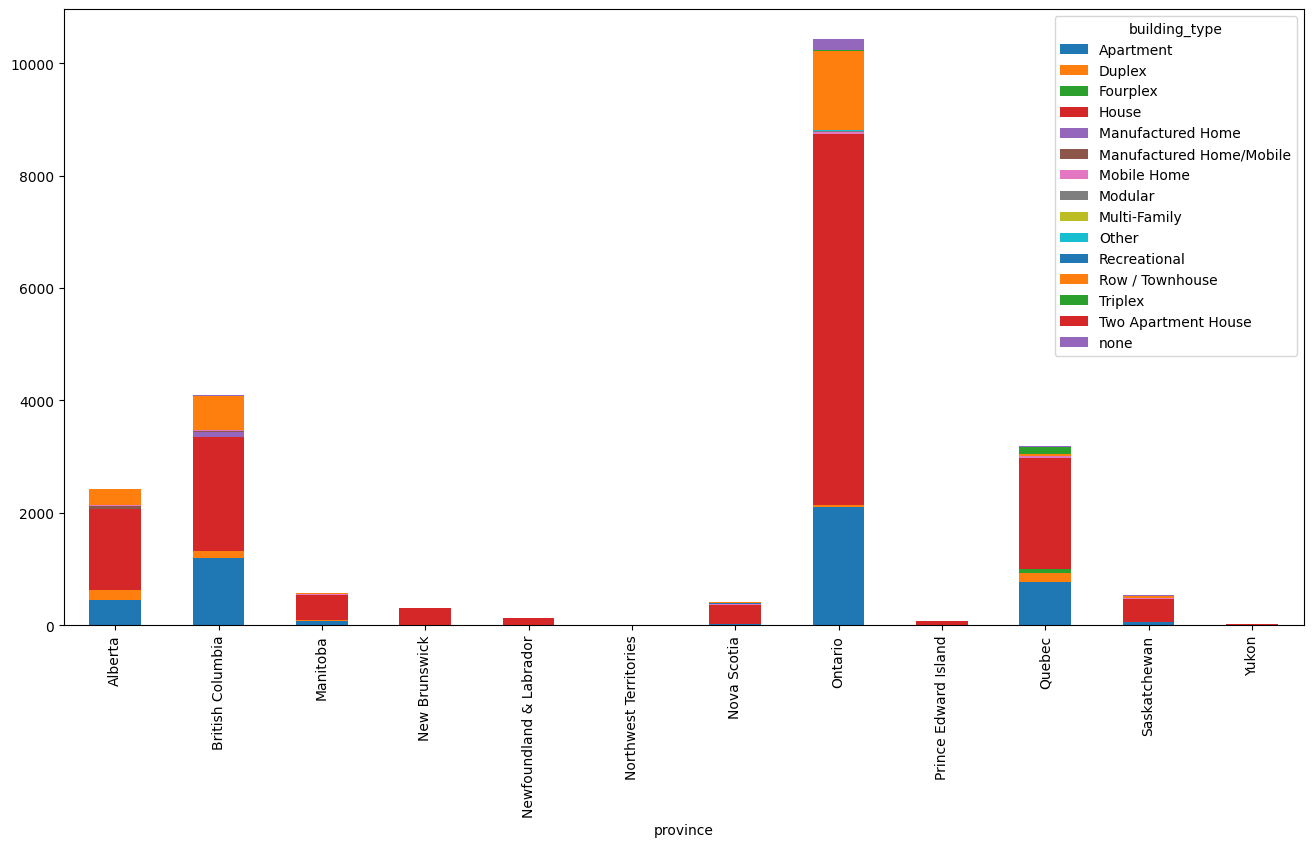

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

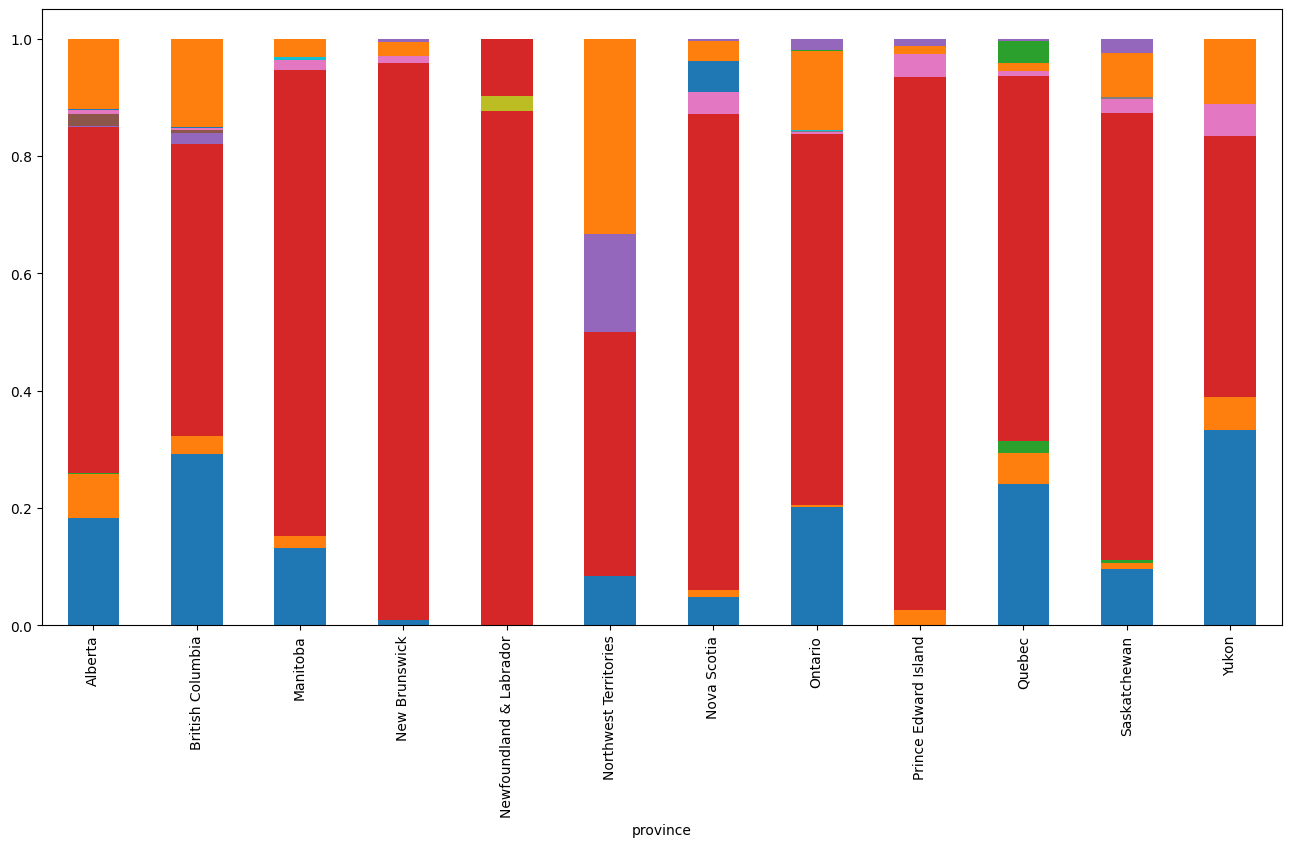

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,740,0,1564,0,14,0,0,0,0,0,0,0,0,0,111
British Columbia,0,52,0,2012,0,58,38,15,0,11,8,1841,12,0,8,36
Manitoba,0,0,0,465,99,12,0,0,0,0,0,0,0,0,0,0
New Brunswick,0,7,0,206,0,3,0,0,0,0,0,0,0,0,1,94
Newfoundland & Labrador,0,0,0,113,0,1,0,0,0,0,0,0,0,0,0,8
Northwest Territories,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,10
Nova Scotia,0,26,0,379,0,7,0,0,0,0,0,0,1,0,1,0
Ontario,545,2222,2,7256,0,55,2,0,5,4,12,0,9,7,0,323
Prince Edward Island,0,1,0,73,0,1,0,0,0,0,0,0,0,0,1,0


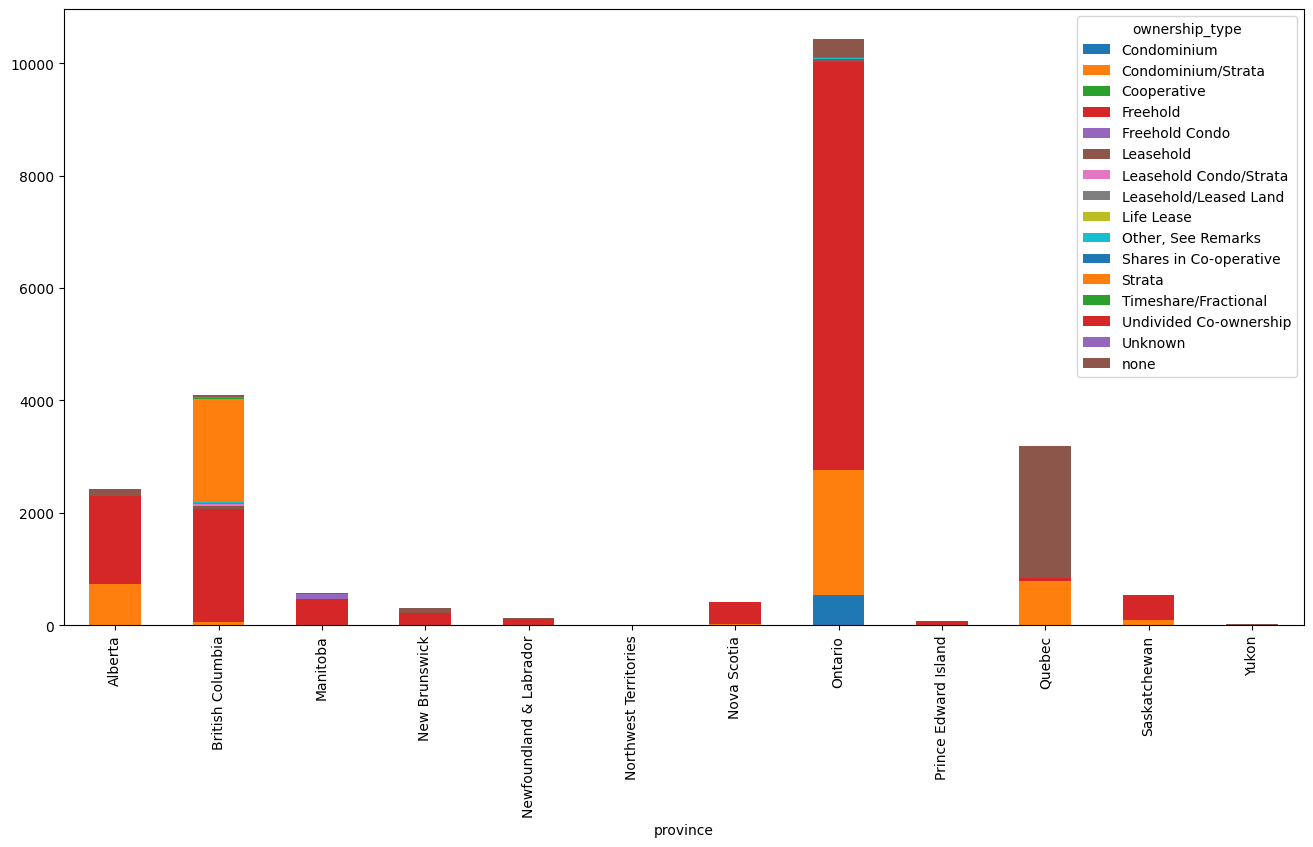

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

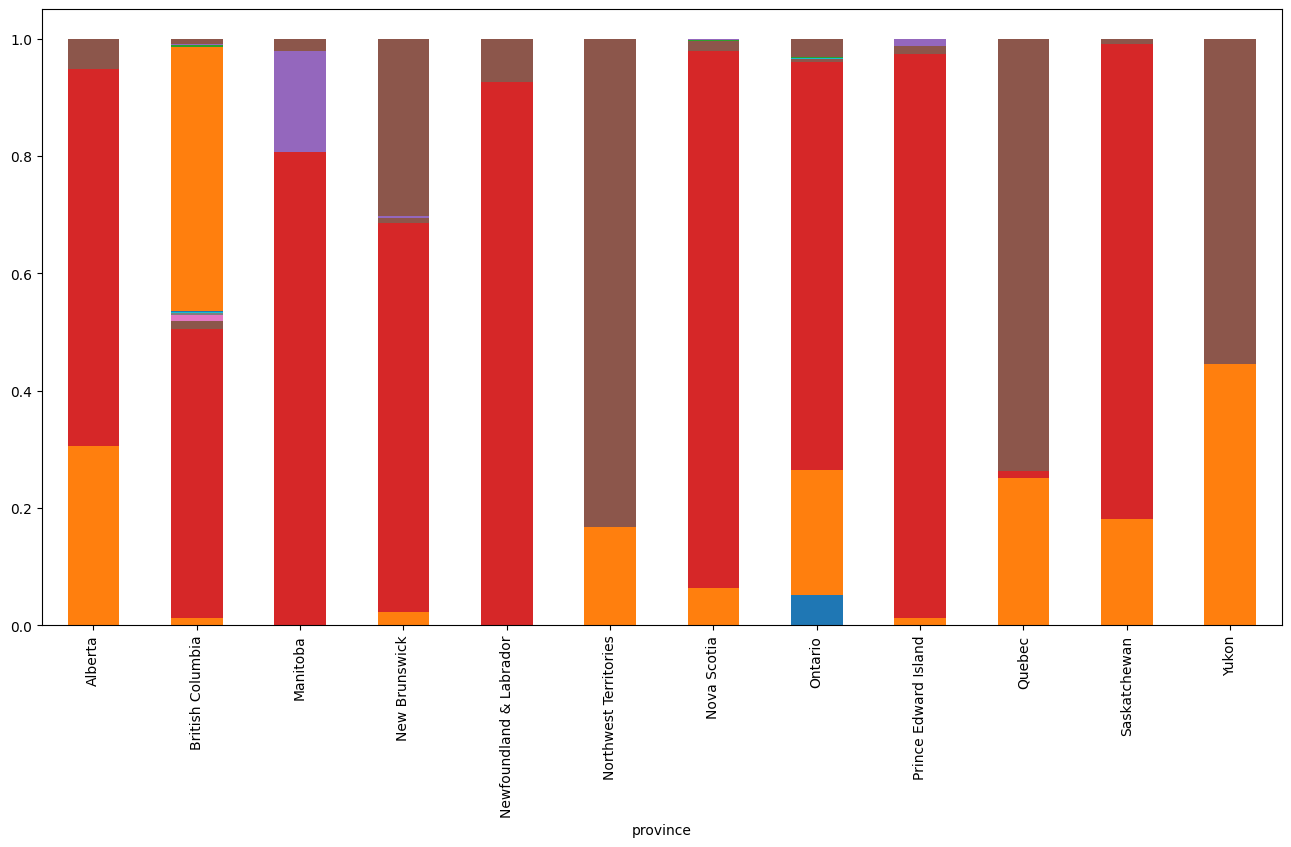

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        2989
Strata                    1109
Condominium                348
Freehold Condo              75
Undivided Co-ownership      47
Leasehold Condo/Strata      30
Freehold                    22
Shares in Co-operative      14
Timeshare/Fractional        14
Leasehold                    3
Life Lease                   2
Leasehold/Leased Land        2
none                         2
Cooperative                  1
Other, See Remarks           1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold              233
none                  204
Strata                 74
Condominium/Strata     33
Leasehold               2
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,
Condominium,348,0,0,14,0,0,0,0,0,0,0,182,0,0,1
Condominium/Strata,2989,33,1,87,0,8,0,0,0,5,0,809,0,0,20
Cooperative,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Freehold,22,233,4,11195,18,55,31,5,3,2,25,849,2,12,50
Freehold Condo,75,0,0,9,0,0,0,0,0,1,0,14,0,0,0
Leasehold,3,2,0,45,29,8,52,9,0,0,0,4,0,0,3
Leasehold Condo/Strata,30,0,0,0,2,1,0,0,0,0,0,7,0,0,0
Leasehold/Leased Land,2,0,0,4,3,0,0,0,0,0,0,6,0,0,0
Life Lease,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0


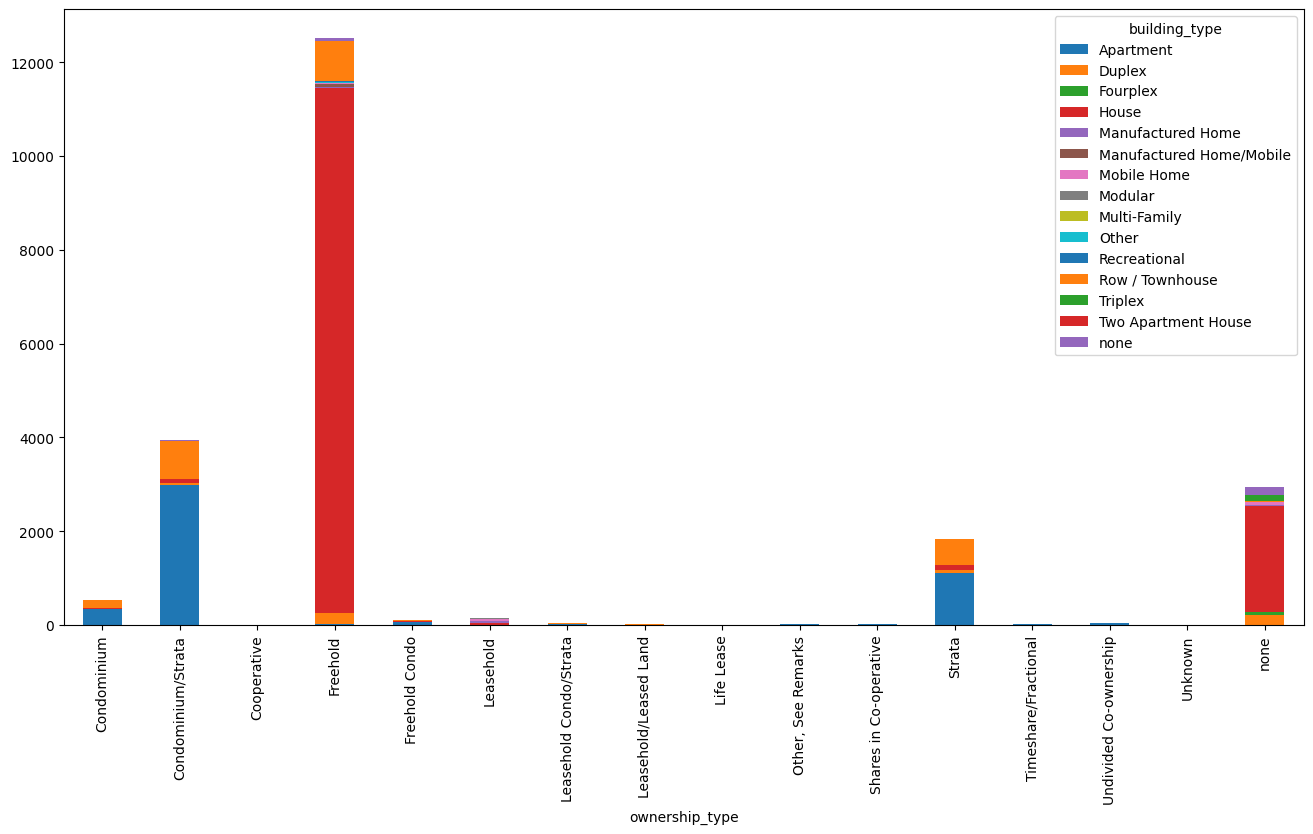

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

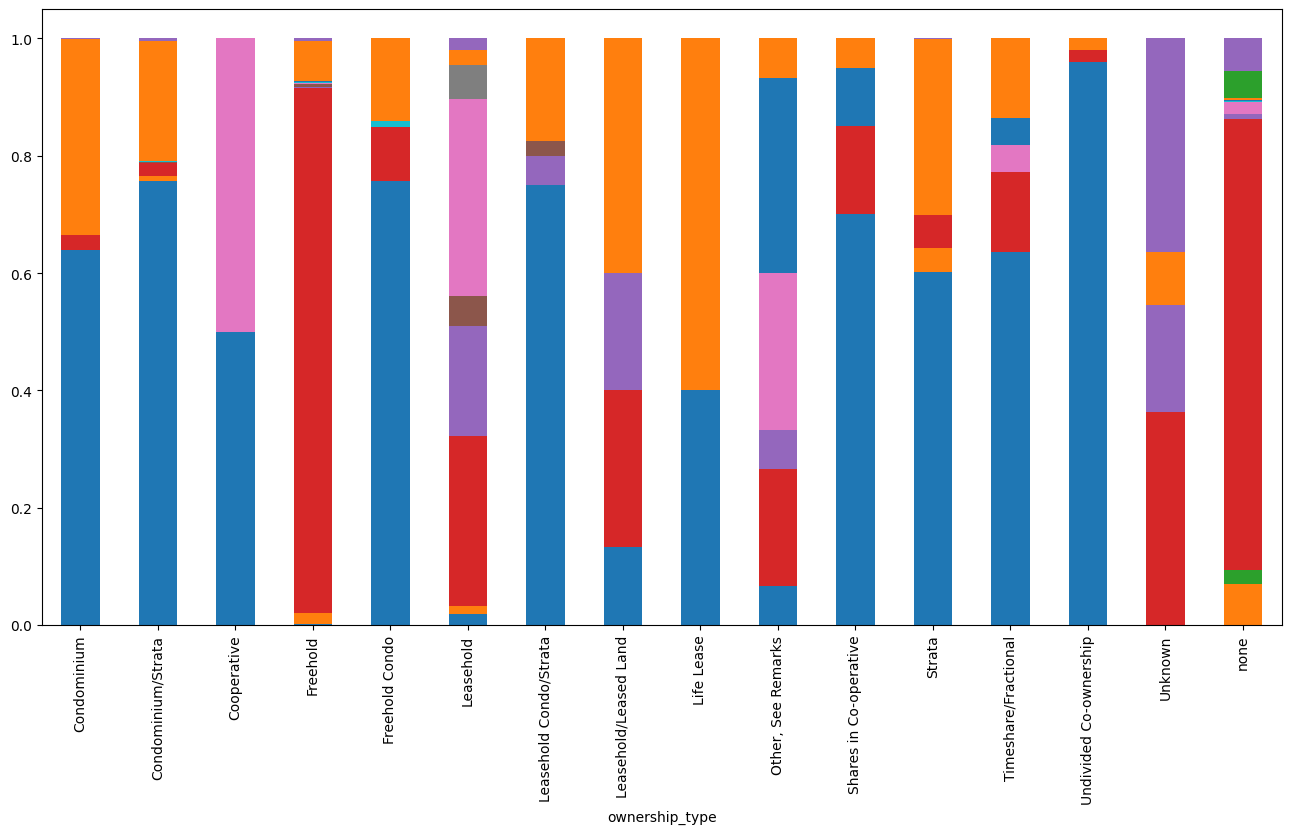

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,546.0,546.0,319.0,546.0,546.0,546.0,5.460000e+02,546.0
mean,26797578.0,2.0,2.0,-100.0,49.0,2.0,6.384961e+17,757729.0
std,8886.0,1.0,1.0,21.0,3.0,2.0,1.388404e+12,540738.0
min,26781559.0,1.0,1.0,-135.0,42.0,0.0,6.384934e+17,24900.0
25%,26790032.0,2.0,2.0,-114.0,46.0,0.0,6.384950e+17,420750.0
50%,26797652.0,2.0,2.0,-113.0,49.0,2.0,6.384960e+17,595700.0
75%,26805755.0,3.0,2.0,-74.0,51.0,4.0,6.384974e+17,861250.0
max,26812564.0,8.0,3.0,-60.0,61.0,12.0,6.384996e+17,4290000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,136.0,136.0,76.0,136.0,136.0,136.0,1.360000e+02,136.0
mean,26798997.0,1.0,2.0,-75.0,46.0,3.0,6.384963e+17,940402.0
std,9224.0,1.0,0.0,5.0,1.0,3.0,1.520865e+12,668924.0
min,26781579.0,0.0,1.0,-114.0,43.0,0.0,6.384934e+17,129000.0
25%,26792264.0,1.0,2.0,-74.0,45.0,0.0,6.384952e+17,636725.0
50%,26798592.0,1.0,2.0,-74.0,46.0,2.0,6.384962e+17,849900.0
75%,26807125.0,1.0,3.0,-73.0,46.0,5.0,6.384975e+17,999250.0
max,26812523.0,12.0,3.0,-64.0,54.0,13.0,6.384996e+17,4999900.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,77.0,77.0,31.0,77.0,77.0,77.0,7.700000e+01,77.0
mean,26799787.0,1.0,2.0,-76.0,46.0,4.0,6.384965e+17,833330.0
std,9188.0,1.0,1.0,10.0,2.0,6.0,1.528216e+12,402838.0
min,26781319.0,1.0,1.0,-121.0,43.0,0.0,6.384932e+17,85000.0
25%,26792257.0,1.0,2.0,-74.0,46.0,0.0,6.384952e+17,588900.0
50%,26801868.0,1.0,2.0,-74.0,46.0,2.0,6.384967e+17,825000.0
75%,26806878.0,1.0,3.0,-73.0,46.0,6.0,6.384975e+17,1050000.0
max,26812604.0,8.0,3.0,-71.0,54.0,42.0,6.384996e+17,2490000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2444.0,2444.0,1766.0,2444.0,2444.0,2444.0,2.444000e+03,2444.0
mean,26797528.0,3.0,2.0,-95.0,46.0,2.0,6.384961e+17,768917.0
std,8873.0,1.0,1.0,20.0,3.0,1.0,1.420198e+12,398189.0
min,26781300.0,0.0,1.0,-135.0,42.0,0.0,6.384932e+17,69900.0
25%,26789997.0,2.0,2.0,-117.0,44.0,1.0,6.384950e+17,545000.0
50%,26797778.0,3.0,2.0,-80.0,44.0,2.0,6.384960e+17,725000.0
75%,26805176.0,3.0,3.0,-79.0,49.0,2.0,6.384973e+17,899900.0
max,26813050.0,6.0,4.0,-60.0,62.0,13.0,6.384999e+17,6500000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       13727
Apartment                    4659
Row / Townhouse              2444
Semi-Detached                 759
none                          244
Mobile Home                   150
Manufactured Home              82
Manufactured Home/Mobile       72
Recreational                   36
Modular                        14
Other                          12
Two Apartment House            12
Multi-Family                    3
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              13727
Apartment           4659
Row / Townhouse     2444
Semi-Detached        759
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21589 entries, 0 to 24711
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21589 non-null  int64  
 1   id_mls                    21589 non-null  object 
 2   bathrooms_total           21589 non-null  int64  
 3   bedrooms                  21589 non-null  object 
 4   stories_total             15052 non-null  float64
 5   size_interior             12198 non-null  object 
 6   building_type             21589 non-null  object 
 7   agency_name               21589 non-null  object 
 8   agency_type               21589 non-null  object 
 9   property_type             21589 non-null  object 
 10  lng                       21589 non-null  float64
 11  lat                       21589 non-null  float64
 12  ownership_type            21589 non-null  object 
 13  ownership_type_group_ids  21589 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    10170
British Columbia            3966
Quebec                      3140
Alberta                     2351
Manitoba                     563
Saskatchewan                 513
Nova Scotia                  375
New Brunswick                305
Newfoundland & Labrador      107
Prince Edward Island          72
Yukon                         17
Northwest Territories         10
Name: count, dtype: int64

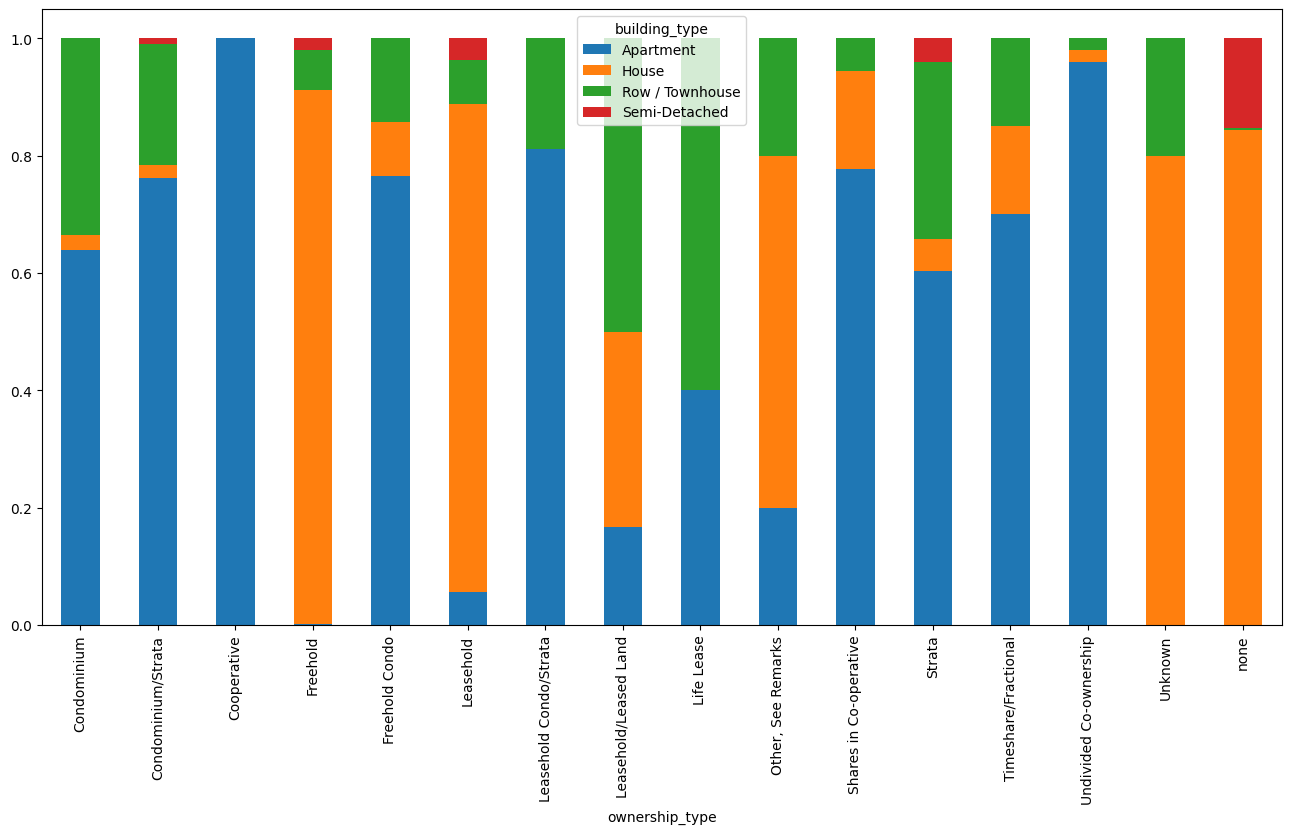

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12305
2           6455
none        2684
4             66
1 2           49
3             20
2 3            5
1 2 3 4        5
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          11195
none        2260
2            215
4             49
1 2 3 4        4
3              3
1 2            1
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       4565
1 2       47
1         22
3         14
4          5
none       4
2 3        2
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    409
1       239
2       109
4         2
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          1566
1           849
none         11
4            10
2 3           3
3             3
1 2           1
1 2 3 4       1
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,12305.0,12305.0,9825.0,12305.0,12305.0,12305.0,1.230500e+04,12305.0
mean,26797302.0,3.0,2.0,-91.0,46.0,3.0,6.384961e+17,1073399.0
std,8993.0,1.0,1.0,19.0,4.0,4.0,1.450794e+12,1273426.0
min,26781262.0,0.0,1.0,-132.0,42.0,0.0,6.384932e+17,1.0
25%,26789489.0,2.0,1.0,-113.0,44.0,0.0,6.384949e+17,559900.0
50%,26797602.0,3.0,2.0,-80.0,45.0,3.0,6.384960e+17,829900.0
75%,26805079.0,4.0,2.0,-79.0,49.0,5.0,6.384973e+17,1288800.0
max,26813046.0,12.0,4.0,-53.0,59.0,99.0,6.384999e+17,84900000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2684.0,2684.0,2375.0,2684.0,2684.0,2684.0,2.684000e+03,2684.0
mean,26798015.0,2.0,2.0,-75.0,46.0,4.0,6.384962e+17,654009.0
std,9286.0,1.0,1.0,10.0,2.0,4.0,1.535572e+12,505183.0
min,26781284.0,0.0,1.0,-136.0,42.0,0.0,6.384932e+17,25000.0
25%,26790282.0,1.0,1.0,-74.0,45.0,2.0,6.384950e+17,379000.0
50%,26798039.0,2.0,2.0,-74.0,46.0,4.0,6.384961e+17,549000.0
75%,26806258.0,2.0,2.0,-72.0,46.0,6.0,6.384974e+17,788250.0
max,26812991.0,8.0,3.0,-55.0,62.0,42.0,6.384999e+17,6890000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,20.0,20.0,9.0,20.0,20.0,20.0,2.000000e+01,20.0
mean,26798325.0,2.0,2.0,-103.0,47.0,1.0,6.384962e+17,166250.0
std,8192.0,1.0,0.0,24.0,2.0,1.0,1.230312e+12,178406.0
min,26782157.0,1.0,2.0,-126.0,45.0,0.0,6.384939e+17,25900.0
25%,26792440.0,1.0,2.0,-124.0,45.0,0.0,6.384953e+17,49650.0
50%,26801672.0,2.0,2.0,-123.0,49.0,0.0,6.384967e+17,112000.0
75%,26803419.0,4.0,2.0,-79.0,49.0,2.0,6.384968e+17,167725.0
max,26811612.0,4.0,2.0,-64.0,50.0,2.0,6.384986e+17,639900.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,66.0,66.0,48.0,66.0,66.0,66.0,6.600000e+01,66.0
mean,26796070.0,2.0,2.0,-100.0,48.0,2.0,6.384959e+17,602005.0
std,8959.0,1.0,1.0,21.0,3.0,3.0,1.443009e+12,342721.0
min,26782136.0,0.0,1.0,-124.0,43.0,0.0,6.384939e+17,94500.0
25%,26787984.0,1.0,1.0,-122.0,45.0,0.0,6.384948e+17,390725.0
50%,26795734.0,2.0,1.0,-100.0,49.0,0.0,6.384958e+17,599950.0
75%,26802758.0,3.0,2.0,-80.0,50.0,3.0,6.384968e+17,737975.0
max,26812884.0,4.0,6.0,-53.0,56.0,14.0,6.384999e+17,2300000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,5.0,5.0,1.0,5.0,5.0,5.0,5.000000e+00,5.0
mean,26804544.0,2.0,2.0,-99.0,48.0,0.0,6.384978e+17,386240.0
std,11723.0,1.0,NaN,31.0,2.0,0.0,2.456137e+12,323340.0
min,26786560.0,1.0,2.0,-123.0,45.0,0.0,6.384943e+17,79200.0
25%,26798632.0,1.0,2.0,-123.0,46.0,0.0,6.384964e+17,99000.0
50%,26811694.0,1.0,2.0,-117.0,49.0,0.0,6.384987e+17,299000.0
75%,26812785.0,3.0,2.0,-66.0,50.0,0.0,6.384999e+17,699000.0
max,26813049.0,3.0,2.0,-65.0,50.0,0.0,6.384999e+17,755000.0


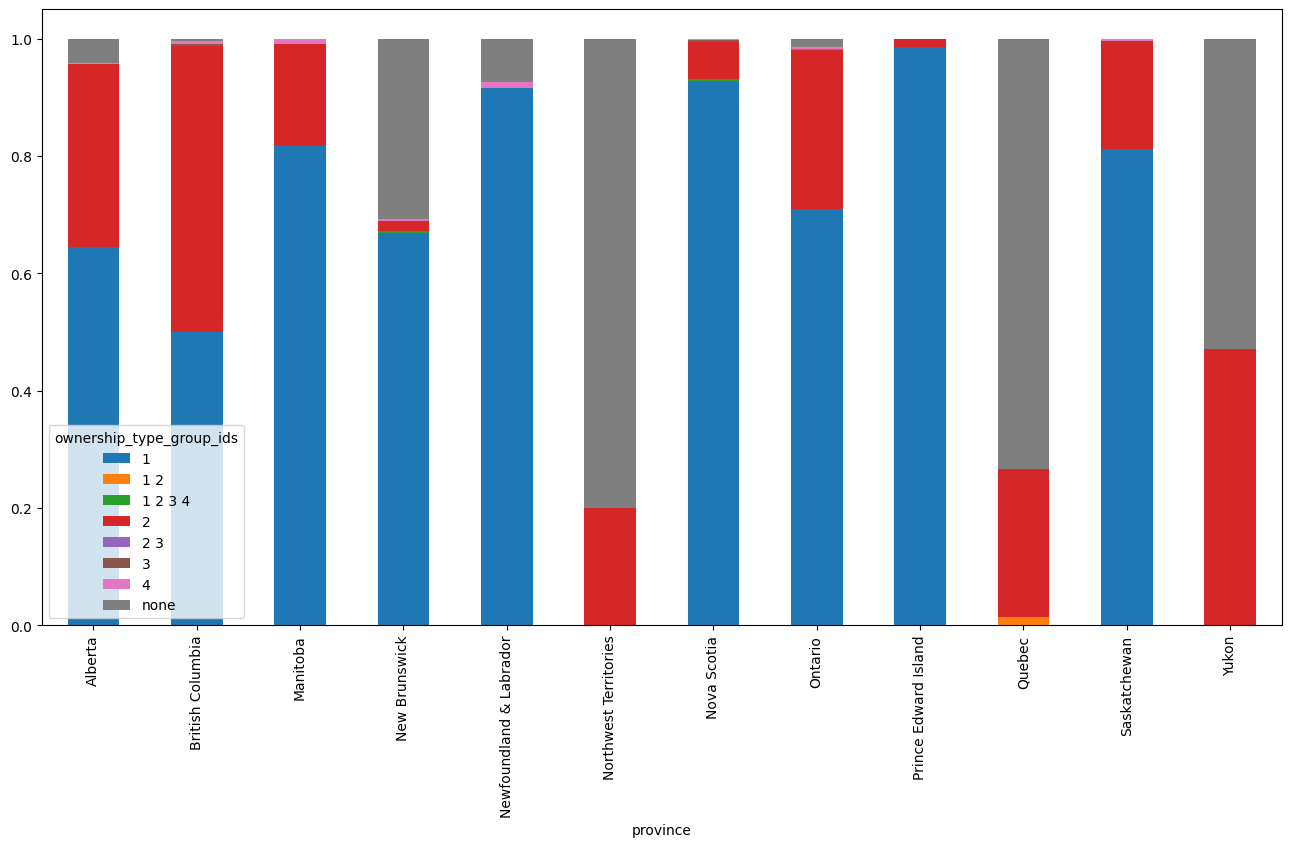

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12305
2           6455
none        2684
4             66
1 2           49
3             20
2 3            5
1 2 3 4        5
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_7218/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    12305
2     6455
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bathrooms_total           18760 non-null  int64  
 3   bedrooms                  18760 non-null  object 
 4   stories_total             12579 non-null  float64
 5   size_interior             11153 non-null  object 
 6   building_type             18760 non-null  object 
 7   agency_name               18760 non-null  object 
 8   agency_type               18760 non-null  object 
 9   property_type             18760 non-null  object 
 10  lng                       18760 non-null  float64
 11  lat                       18760 non-null  float64
 12  ownership_type            18760 non-null  object 
 13  ownership_type_group_ids  18760 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    9973
British Columbia           3912
Alberta                    2249
Quebec                      796
Manitoba                    558
Saskatchewan                511
Nova Scotia                 372
New Brunswick               209
Newfoundland & Labrador      98
Prince Edward Island         72
Yukon                         8
Northwest Territories         2
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_7218/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    10500
True      8260
Name: count, dtype: int64

In [73]:
df.shape

(18760, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_7218/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26812899,24009790,1,3 + 0,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.292637,Freehold,1,35X233,0,https://realtor.ca/real-estate/26812899/1615-c...,638499928468370000,N9B3N7,Ontario,299999.0
1,26812579,24009765,2,3 + 2,1.0,NaN,House,JUMP REALTY INC.,Firm,Single Family,...,42.301384,Freehold,1,30X123.5,0,https://realtor.ca/real-estate/26812579/450-cl...,638499628222870000,N8X1A8,Ontario,499800.0
2,26812578,24009780,2,3 + 0,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.186587,Freehold,1,80X200,0,https://realtor.ca/real-estate/26812578/9542-m...,638499628219030000,N9J2W2,Ontario,599900.0
3,26811144,24009718,2,3 + 0,NaN,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,Single Family,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
4,26810794,24009756,2,2 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,Single Family,...,42.307084,Condominium/Strata,2,0X0.00,0,https://realtor.ca/real-estate/26810794/3000-s...,638498314741070000,N9C4G3,Ontario,249900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_7218/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    3678
1    3152
2    1184
3     222
4      18
5       3
6       1
7       1
8       1
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

18760

In [80]:
bedrooms_extra[:20]

['0',
 '2',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '3',
 '1']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26812899,24009790,0,1,3 + 0,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.292637,Freehold,1,35X233,0,https://realtor.ca/real-estate/26812899/1615-c...,638499928468370000,N9B3N7,Ontario,299999.0
1,26812579,24009765,2,2,3 + 2,1.0,NaN,House,JUMP REALTY INC.,Firm,...,42.301384,Freehold,1,30X123.5,0,https://realtor.ca/real-estate/26812579/450-cl...,638499628222870000,N8X1A8,Ontario,499800.0
2,26812578,24009780,0,2,3 + 0,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.186587,Freehold,1,80X200,0,https://realtor.ca/real-estate/26812578/9542-m...,638499628219030000,N9J2W2,Ontario,599900.0
3,26811144,24009718,0,2,3 + 0,NaN,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
4,26810794,24009756,0,2,2 + 0,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.307084,Condominium/Strata,2,0X0.00,0,https://realtor.ca/real-estate/26810794/3000-s...,638498314741070000,N9C4G3,Ontario,249900.0
6,26810324,24009755,2,4,3 + 2,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.319843,Freehold,1,34.33X125.62,0,https://realtor.ca/real-estate/26810324/1116-w...,638497900260900000,N9A3K2,Ontario,499000.0
7,26809072,X8275986,0,2,2,1.0,NaN,Row / Townhouse,COLDWELL BANKER RONAN REALTY,Firm,...,42.248501,Condominium/Strata,2,NaN,4,https://realtor.ca/real-estate/26809072/6156-t...,638497638613630000,N9J3Y7,Ontario,699000.0
8,26808741,40578441,0,2,2 + 0,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26808741/6156-t...,638497631610800000,N9J3Y7,Ontario,699000.0
10,26808388,24009746,0,2,4 + 0,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.153269,Freehold,1,62X703,0,https://realtor.ca/real-estate/26808388/1248-f...,638497585568900000,N9V3R3,Ontario,899900.0
11,26807696,24009726,0,1,1 + 0,NaN,NaN,Apartment,H. FEATHERSTONE REALTY INC. - 251,Firm,...,42.223825,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26807696/7333-m...,638497552648430000,N9H0A8,Ontario,439000.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_7218/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  object 
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  object 
 5   stories_total             12579 non-null  float64
 6   size_interior             11153 non-null  object 
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_7218/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26812899,24009790,0,1,3,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.292637,Freehold,1,35X233,0,https://realtor.ca/real-estate/26812899/1615-c...,638499928468370000,N9B3N7,Ontario,299999.0
1,26812579,24009765,2,2,3,1.0,NaN,House,JUMP REALTY INC.,Firm,...,42.301384,Freehold,1,30X123.5,0,https://realtor.ca/real-estate/26812579/450-cl...,638499628222870000,N8X1A8,Ontario,499800.0
2,26812578,24009780,0,2,3,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.186587,Freehold,1,80X200,0,https://realtor.ca/real-estate/26812578/9542-m...,638499628219030000,N9J2W2,Ontario,599900.0
3,26811144,24009718,0,2,3,NaN,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
4,26810794,24009756,0,2,2,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.307084,Condominium/Strata,2,0X0.00,0,https://realtor.ca/real-estate/26810794/3000-s...,638498314741070000,N9C4G3,Ontario,249900.0
6,26810324,24009755,2,4,3,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.319843,Freehold,1,34.33X125.62,0,https://realtor.ca/real-estate/26810324/1116-w...,638497900260900000,N9A3K2,Ontario,499000.0
7,26809072,X8275986,0,2,2,1.0,NaN,Row / Townhouse,COLDWELL BANKER RONAN REALTY,Firm,...,42.248501,Condominium/Strata,2,NaN,4,https://realtor.ca/real-estate/26809072/6156-t...,638497638613630000,N9J3Y7,Ontario,699000.0
8,26808741,40578441,0,2,2,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26808741/6156-t...,638497631610800000,N9J3Y7,Ontario,699000.0
10,26808388,24009746,0,2,4,1.0,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.153269,Freehold,1,62X703,0,https://realtor.ca/real-estate/26808388/1248-f...,638497585568900000,N9V3R3,Ontario,899900.0
11,26807696,24009726,0,1,1,NaN,NaN,Apartment,H. FEATHERSTONE REALTY INC. - 251,Firm,...,42.223825,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26807696/7333-m...,638497552648430000,N9H0A8,Ontario,439000.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             12579 non-null  float64
 6   size_interior             11153 non-null  object 
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    9973
British Columbia           3912
Alberta                    2249
Quebec                      796
Manitoba                    558
Saskatchewan                511
Nova Scotia                 372
New Brunswick               209
Newfoundland & Labrador      98
Prince Edward Island         72
Yukon                         8
Northwest Territories         2
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             12579 non-null  float64
 6   size_interior             11153 non-null  object 
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26812899,24009790,0,1,3,2.0,NaN,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.292637,Freehold,1,35X233,0,https://realtor.ca/real-estate/26812899/1615-c...,638499928468370000,N9B3N7,Ontario,299999.0
1,26812579,24009765,2,2,3,1.0,NaN,House,JUMP REALTY INC.,Firm,...,42.301384,Freehold,1,30X123.5,0,https://realtor.ca/real-estate/26812579/450-cl...,638499628222870000,N8X1A8,Ontario,499800.0
2,26812578,24009780,0,2,3,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.186587,Freehold,1,80X200,0,https://realtor.ca/real-estate/26812578/9542-m...,638499628219030000,N9J2W2,Ontario,599900.0
3,26811144,24009718,0,2,3,NaN,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
4,26810794,24009756,0,2,2,NaN,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.307084,Condominium/Strata,2,0X0.00,0,https://realtor.ca/real-estate/26810794/3000-s...,638498314741070000,N9C4G3,Ontario,249900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
0.00        1
1.00     4484
1.50      467
1.75       42
2.00     5765
2.50      144
3.00      973
4.00      306
5.00       47
6.00       71
7.00       33
8.00       25
9.00       17
10.00      12
11.00      10
12.00      32
13.00       3
14.00       8
15.00      10
16.00       5
17.00      15
18.00       6
19.00       7
20.00       8
21.00      10
22.00       8
23.00       5
24.00       3
25.00       6
26.00       8
27.00       1
28.00       3
29.00       3
30.00       4
31.00       2
32.00       2
33.00       1
34.00       5
35.00       2
36.00       3
38.00       4
39.00       1
40.00       3
41.00       3
44.00       3
46.00       1
48.00       1
50.00       1
52.00       2
54.00       1
58.00       1
80.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
0.00        1
1.00     4484
1.50      467
1.75       42
2.00     5765
2.50      144
3.00      973
4.00      306
5.00       47
6.00       71
7.00       33
8.00       25
9.00       17
10.00      12
11.00      10
12.00      32
13.00       3
14.00       8
15.00      10
16.00       5
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10951,26800283,1387358,0,1,2,0.0,NaN,Apartment,KELLER WILLIAMS INTEGRITY REALTY,Firm,...,45.282205,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26800283/170-wa...,638496583152370000,K2G7C6,Ontario,369000.0


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

building_type
Apartment    1
Name: count, dtype: int64

In [95]:
df[df["stories_total"] == 0]["page_url"]

10951    https://realtor.ca/real-estate/26800283/170-wa...
Name: page_url, dtype: object

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          2893
House              2494
Row / Townhouse     669
Semi-Detached       125
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

2        https://realtor.ca/real-estate/26812578/9542-m...
3        https://realtor.ca/real-estate/26811144/113-il...
4        https://realtor.ca/real-estate/26810794/3000-s...
11       https://realtor.ca/real-estate/26807696/7333-m...
14       https://realtor.ca/real-estate/26807692/226-vi...
                               ...                        
24687    https://realtor.ca/real-estate/26797612/49-a-a...
24688    https://realtor.ca/real-estate/26797194/101-11...
24695    https://realtor.ca/real-estate/26782529/404-38...
24708    https://realtor.ca/real-estate/26794196/201-62...
24710    https://realtor.ca/real-estate/26781967/35-705...
Name: page_url, Length: 6181, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  object 
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     10666
2.00      5765
3.00       973
1.50       467
4.00       306
2.50       144
6.00        71
5.00        47
1.75        42
7.00        33
12.00       32
8.00        25
9.00        17
17.00       15
10.00       12
15.00       10
21.00       10
11.00       10
22.00        8
26.00        8
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

24       https://realtor.ca/real-estate/26805612/528-ca...
541      https://realtor.ca/real-estate/26803620/904-we...
562      https://realtor.ca/real-estate/26802275/2-1850...
616      https://realtor.ca/real-estate/26799105/3402-s...
651      https://realtor.ca/real-estate/26796186/20-reg...
                               ...                        
24567    https://realtor.ca/real-estate/26807940/10516-...
24574    https://realtor.ca/real-estate/26802679/8220-8...
24579    https://realtor.ca/real-estate/26797446/8330-8...
24630    https://realtor.ca/real-estate/26798485/431-20...
24642    https://realtor.ca/real-estate/26792305/307-10...
Name: page_url, Length: 973, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec              600
Alberta             273
British Columbia    167
Ontario              72
Nova Scotia           1
Manitoba              1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

575      https://realtor.ca/real-estate/26801453/2062-l...
665      https://realtor.ca/real-estate/26795235/1220-r...
760      https://realtor.ca/real-estate/26789448/301-15...
1322     https://realtor.ca/real-estate/26806262/207-bo...
1691     https://realtor.ca/real-estate/26809040/7-25-m...
                               ...                        
24642    https://realtor.ca/real-estate/26792305/307-10...
24648    https://realtor.ca/real-estate/26790162/1315-1...
24651    https://realtor.ca/real-estate/26786632/1008-1...
24653    https://realtor.ca/real-estate/26785793/1203-1...
24655    https://realtor.ca/real-estate/26785072/1301-1...
Name: page_url, Length: 1114, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
3        False
4        False
         ...  
24687    False
24688    False
24695    False
24708    False
24710    False
Length: 18760, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
3        True
4        True
         ... 
24687    True
24688    True
24695    True
24708    True
24710    True
Length: 18760, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 575 to 24655
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1114 non-null   int64  
 1   id_mls                    1114 non-null   object 
 2   bedrooms_extra            1114 non-null   int64  
 3   bathrooms_total           1114 non-null   int64  
 4   bedrooms                  1114 non-null   int64  
 5   stories_total             1114 non-null   float64
 6   size_interior             1039 non-null   object 
 7   building_type             1114 non-null   object 
 8   agency_name               1114 non-null   object 
 9   agency_type               1114 non-null   object 
 10  property_type             1114 non-null   object 
 11  lng                       1114 non-null   float64
 12  lat                       1114 non-null   float64
 13  ownership_type            1114 non-null   object 
 14  ownership_

In [106]:
# df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# set storeys for all appartments to 1
df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00    11780
2.00     5639
3.00      673
1.50      466
2.50      143
1.75       42
4.00       17
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([2.  , 1.  , 2.5 , 3.  , 1.5 , 1.75, 4.  ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    9973
British Columbia           3912
Alberta                    2249
Quebec                      796
Manitoba                    558
Saskatchewan                511
Nova Scotia                 372
New Brunswick               209
Newfoundland & Labrador      98
Prince Edward Island         72
Yukon                         8
Northwest Territories         2
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  object 
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1100.0000      29
1500.0000      26
1100 sqft      23
1200.0000      18
1050 sqft      18
               ..
468.23 sqft     1
767.47 sqft     1
432.71 sqft     1
818.06 sqft     1
1553 sqft       1
Name: count, Length: 6382, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,26811144,24009718,0,2,3,1.0,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
8,26808741,40578441,0,2,2,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26808741/6156-t...,638497631610800000,N9J3Y7,Ontario,699000.0
15,26807382,24009731,0,2,2,1.0,1118.0000,Apartment,HOMELIFE GOLD STAR REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26807382/2550-s...,638497516515400000,N9H2R6,Ontario,499900.0
16,26806626,24009717,0,3,4,2.0,2300.0000,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.225373,Freehold,1,45X128,0,https://realtor.ca/real-estate/26806626/4532-v...,638497480570070000,N9H0N1,Ontario,1079000.0
37,26801431,24009637,0,4,4,2.0,4000.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.223486,Freehold,1,81.96X,0,https://realtor.ca/real-estate/26801431/4985-t...,638496652544400000,N9J3P1,Ontario,1599999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24687,26797612,15570,0,3,4,1.0,2297 sqft,Row / Townhouse,RE/MAX ACTION REALTY,Firm,...,60.778401,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26797612/49-a-a...,638495986791570000,Y1A6E1,Yukon,569000.0
24688,26797194,15569,0,3,3,1.0,1553 sqft,House,URBAN REALTY GROUP,Firm,...,60.711825,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26797194/101-11...,638495950870000000,Y1A0J6,Yukon,539000.0
24695,26782529,15558,0,3,2,1.0,1344 sqft,Apartment,2% Realty Midnight Sun,Firm,...,60.730961,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26782529/404-38...,638493935123630000,Y1A6V1,Yukon,819000.0
24708,26794196,5769,0,2,2,1.0,930 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.440705,Condominium/Strata,2,930,0,https://realtor.ca/real-estate/26794196/201-62...,638495704476170000,NaN,Northwest Territories,315000.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
3,26811144,24009718,0,2,3,1.0,1218.0000,House,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.107014,Freehold,1,49.21X100.3,0,https://realtor.ca/real-estate/26811144/113-il...,638498422922370000,N9V3Y4,Ontario,479900.0
8,26808741,40578441,0,2,2,1.0,1255.0000,Row / Townhouse,Coldwell Banker Ronan Realty Brokerage,Firm,...,42.248272,Condominium,2,NaN,4,https://realtor.ca/real-estate/26808741/6156-t...,638497631610800000,N9J3Y7,Ontario,699000.0
15,26807382,24009731,0,2,2,1.0,1118.0000,Apartment,HOMELIFE GOLD STAR REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26807382/2550-s...,638497516515400000,N9H2R6,Ontario,499900.0
16,26806626,24009717,0,3,4,2.0,2300.0000,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.225373,Freehold,1,45X128,0,https://realtor.ca/real-estate/26806626/4532-v...,638497480570070000,N9H0N1,Ontario,1079000.0
37,26801431,24009637,0,4,4,2.0,4000.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.223486,Freehold,1,81.96X,0,https://realtor.ca/real-estate/26801431/4985-t...,638496652544400000,N9J3P1,Ontario,1599999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14432,26800322,40577825,0,1,2,1.0,1083.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,46.411889,Freehold,1,2.47 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/26800322/1255-s...,638496585950900000,P0H1V0,Ontario,699000.0
14433,26795350,40577025,0,1,2,1.0,728.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,46.317418,Freehold,1,0.25 ac|under 1/2 acre,2,https://realtor.ca/real-estate/26795350/449-va...,638495781952570000,P0H1V0,Ontario,234900.0
14434,26794170,40574019,0,1,3,2.0,3696.0000,House,"Century 21 Blue Sky Region Realty Inc., Brokerage",Firm,...,46.304695,Freehold,1,0.464 ac|under 1/2 acre,6,https://realtor.ca/real-estate/26794170/9-earl...,638495697914800000,P0H1V0,Ontario,489900.0
15567,26793388,40576785,0,6,9,2.0,8000.0000,House,CMI REAL ESTATE INC,Firm,...,47.117154,Freehold,1,2.25 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/26793388/240-ka...,638495650592400000,P0H2H0,Ontario,1990000.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
19823,26810829,A2125063,1,3,1,1.0,875.32 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.605920,Freehold,1,"5750 sqft|4,051 - 7,250 sqft",5,https://realtor.ca/real-estate/26810829/1729-1...,638498345819900000,T0K0E0,Alberta,545000.0
19828,26804582,A2126336,0,2,4,2.0,3082 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.581480,Freehold,1,1.2 ac|1 - 1.99 acres,12,https://realtor.ca/real-estate/26804582/21402-...,638497006511900000,T0K0C0,Alberta,1075000.0
19830,26801384,A2126173,0,3,3,1.0,1212 sqft,House,RE/MAX REAL ESTATE - LETHBRIDGE,Firm,...,49.575336,Freehold,1,"4635 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26801384/2934-2...,638496646522570000,T0K0C0,Alberta,399000.0
19834,26791424,A2125176,2,4,2,2.0,2032 sqft,House,RE/MAX REAL ESTATE - LETHBRIDGE,Firm,...,49.646640,Condominium/Strata,2,"14332 sqft|10,890 - 21,799 sqft (1/4 - 1/2 ac)",6,https://realtor.ca/real-estate/26791424/34-kan...,638495070011170000,T0K0M0,Alberta,1089000.0
19836,26787211,A2125298,0,1,2,1.0,833 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.584144,Freehold,1,"6000 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26787211/2222-2...,638494456583470000,T0K0C0,Alberta,444000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24671,26792586,A2121990,1,3,3,1.0,1301 sqft,House,M&M Real Estate,Firm,...,58.518560,Freehold,1,"557.4 m2|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26792586/10303-...,638495246483530000,T0H1Z0,Alberta,289900.0
24672,26806197,A2126091,1,2,2,1.0,1112 sqft,House,RE/MAX Grande Prairie,Firm,...,58.312524,Freehold,1,10 ac|10 - 49 acres,15,https://realtor.ca/real-estate/26806197/14160-...,638497434617430000,T0H2H0,Alberta,450000.0
24674,26797107,A2124189,2,3,3,1.0,1128 sqft,House,RE/MAX Grande Prairie,Firm,...,58.200801,Freehold,1,2 ac|2 - 4.99 acres,10,https://realtor.ca/real-estate/26797107/11202-...,638495933621830000,T0H2H0,Alberta,499000.0
24676,26790798,A2125155,0,3,4,1.0,2640 sqft,House,RE/MAX Grande Prairie,Firm,...,58.299315,Freehold,1,3.43 ac|2 - 4.99 acres,15,https://realtor.ca/real-estate/26790798/107276...,638495015185330000,T0H2H0,Alberta,850000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10655,26811725,27164706,0,1,1,1.0,711.49 sqft,Apartment,M IMMOBILIER - Hudson,Firm,...,45.540017,Condominium/Strata,2,2945.2 m2,1,https://realtor.ca/real-estate/26811725/81-ch-...,638498708689300000,J9B0C3,Quebec,549900.0
10694,26810458,26844005,0,1,2,1.0,838.83 sqft,Apartment,VENDIRECT INC.,Firm,...,45.450681,Condominium/Strata,2,1292.96 sqft,1,https://realtor.ca/real-estate/26810458/232-bo...,638498168259100000,J8Y6L1,Quebec,249900.0
10754,26807496,26614941,0,2,2,1.0,1328 sqft,Apartment,RE/MAX VISION,Firm,...,45.409385,Condominium/Strata,2,84.06 sqft,1,https://realtor.ca/real-estate/26807496/1180-c...,638497524131870000,J9H0G5,Quebec,645000.0
10782,26806333,28328594,0,1,2,1.0,1236.77 sqft,Apartment,RE/MAX VISION - Hull,Firm,...,45.437889,Condominium/Strata,2,182.5 m2,1,https://realtor.ca/real-estate/26806333/280-bo...,638497451545300000,J9J0P2,Quebec,389900.0
10787,26806326,16950298,0,1,2,1.0,1132 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.505410,Condominium/Strata,2,2013.08 sqft,1,https://realtor.ca/real-estate/26806326/4-imp-...,638497451326970000,J8P0A9,Quebec,297900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,26781682,10202336,0,1,1,1.0,818.06 sqft,Apartment,VIA CAPITALE SÉLECT,Firm,...,46.795656,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26781682/1490-b...,638493441669470000,G1S4V3,Quebec,204000.0
15150,26781586,14049078,0,1,1,1.0,691.04 sqft,Apartment,RE/MAX ACCÈS INC. - Thetford Mines (Notre-Dam...,Firm,...,46.083340,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26781586/680-ru...,638493377069930000,G6G3V8,Quebec,135000.0
16412,26809980,26497771,0,1,3,1.0,611.28 sqft,House,GROUPE SUTTON-NOUVELLE DEMEURE - Jonquière,Firm,...,48.396216,Condominium/Strata,2,343.1 m2,4,https://realtor.ca/real-estate/26809980/581z-r...,638497777385270000,G7S4S8,Quebec,249900.0
16445,26783892,20556645,0,1,3,1.0,910.63 sqft,Apartment,GROUPE SUTTON-NOUVELLE DEMEURE - Alma,Firm,...,48.406338,Condominium/Strata,2,1876.45 m2,1,https://realtor.ca/real-estate/26783892/639-ru...,638494038689700000,G7H6R1,Quebec,175000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_7218/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10987,26799323,19192412,0,2,3,1.0,174.1 m2,House,Century 21 ® Élite,Firm,...,45.644952,Condominium/Strata,2,243 m2,2,https://realtor.ca/real-estate/26799323/39z-ch...,638496516508700000,J0X3G0,Quebec,629900.0
11039,26797780,19920023,0,1,2,1.0,104.6 m2,Apartment,ENGEL & VÖLKERS OUTAOUAIS,Firm,...,45.432502,Condominium/Strata,2,182 m2,1,https://realtor.ca/real-estate/26797780/72-rue...,638496009890300000,J9J0S9,Quebec,343000.0
11591,26798057,16264200,0,1,2,1.0,101.7 m2,Apartment,GROUPE SUTTON - PERFORMER INC.,Firm,...,45.402519,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26798057/3121-b...,638496058076300000,J7V0T6,Quebec,429000.0
11824,26812303,20090623,0,1,1,1.0,43.8 m2,Apartment,ROYAL LEPAGE RAYMOND TSIM INC.,Firm,...,45.491794,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26812303/170-ru...,638499391225900000,H3C2A5,Quebec,385000.0
11855,26811897,22852918,0,1,1,1.0,36.4 m2,Apartment,LES IMMEUBLES CHARISMA INC.,Firm,...,45.529408,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26811897/3535-a...,638499140017070000,H2K4J9,Quebec,224999.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    801
Quebec      41
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10987,26799323,19192412,0,2,3,1.0,1874.0124,House,Century 21 ® Élite,Firm,...,45.644952,Condominium/Strata,2,243 m2,2,https://realtor.ca/real-estate/26799323/39z-ch...,638496516508700000,J0X3G0,Quebec,629900.0
11039,26797780,19920023,0,1,2,1.0,1125.9144,Apartment,ENGEL & VÖLKERS OUTAOUAIS,Firm,...,45.432502,Condominium/Strata,2,182 m2,1,https://realtor.ca/real-estate/26797780/72-rue...,638496009890300000,J9J0S9,Quebec,343000.0
11591,26798057,16264200,0,1,2,1.0,1094.6988,Apartment,GROUPE SUTTON - PERFORMER INC.,Firm,...,45.402519,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26798057/3121-b...,638496058076300000,J7V0T6,Quebec,429000.0
11824,26812303,20090623,0,1,1,1.0,471.4632,Apartment,ROYAL LEPAGE RAYMOND TSIM INC.,Firm,...,45.491794,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26812303/170-ru...,638499391225900000,H3C2A5,Quebec,385000.0
11855,26811897,22852918,0,1,1,1.0,391.8096,Apartment,LES IMMEUBLES CHARISMA INC.,Firm,...,45.529408,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26811897/3535-a...,638499140017070000,H2K4J9,Quebec,224999.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_7218/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
294,26792092,24008434,0,2,4,2.00,1654 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.405160,Freehold,1,62.59XIRR|under 1/4 acre,0,https://realtor.ca/real-estate/26792092/54-fin...,638495144762000000,N7L1H6,Ontario,449900.0
515,26805326,24009619,0,5,5,2.00,4195 sqft,House,EXIT REALTY CK ELITE,Firm,...,42.550118,Freehold,1,125.5XIRREG|1 - 3 acres,0,https://realtor.ca/real-estate/26805326/23356-...,638497370344070000,N0P2K0,Ontario,1299900.0
541,26803620,H4191791,0,4,4,3.00,1951 sqft,Row / Townhouse,RE/MAX Escarpment Realty Inc,Firm,...,42.991159,Condominium,2,23.39 x 75.03,4,https://realtor.ca/real-estate/26803620/904-we...,638496831832870000,N6H0J7,Ontario,719000.0
848,26784178,24008273,0,3,4,1.75,3420 sqft,House,DEERBROOK REALTY INC.,Firm,...,42.273505,Freehold,1,132X220|1/2 - 1 acre,0,https://realtor.ca/real-estate/26784178/18332-...,638494058583100000,N0P1A0,Ontario,799900.0
912,26809189,H4192071,0,1,2,1.50,1270 sqft,House,RE/MAX Escarpment Realty Inc.,Firm,...,42.791015,Freehold,1,82.5 x 66|under 1/2 acre,8,https://realtor.ca/real-estate/26809189/109-mc...,638497660077670000,N0A1N0,Ontario,699900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3010
Alberta                    1447
Quebec                      707
Manitoba                    557
Saskatchewan                511
Ontario                     448
New Brunswick               104
Newfoundland & Labrador      97
Yukon                         8
Northwest Territories         2
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
294,26792092,24008434,0,2,4,2.00,1654.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.405160,Freehold,1,62.59XIRR|under 1/4 acre,0,https://realtor.ca/real-estate/26792092/54-fin...,638495144762000000,N7L1H6,Ontario,449900.0
515,26805326,24009619,0,5,5,2.00,4195.0,House,EXIT REALTY CK ELITE,Firm,...,42.550118,Freehold,1,125.5XIRREG|1 - 3 acres,0,https://realtor.ca/real-estate/26805326/23356-...,638497370344070000,N0P2K0,Ontario,1299900.0
541,26803620,H4191791,0,4,4,3.00,1951.0,Row / Townhouse,RE/MAX Escarpment Realty Inc,Firm,...,42.991159,Condominium,2,23.39 x 75.03,4,https://realtor.ca/real-estate/26803620/904-we...,638496831832870000,N6H0J7,Ontario,719000.0
848,26784178,24008273,0,3,4,1.75,3420.0,House,DEERBROOK REALTY INC.,Firm,...,42.273505,Freehold,1,132X220|1/2 - 1 acre,0,https://realtor.ca/real-estate/26784178/18332-...,638494058583100000,N0P1A0,Ontario,799900.0
912,26809189,H4192071,0,1,2,1.50,1270.0,House,RE/MAX Escarpment Realty Inc.,Firm,...,42.791015,Freehold,1,82.5 x 66|under 1/2 acre,8,https://realtor.ca/real-estate/26809189/109-mc...,638497660077670000,N0A1N0,Ontario,699900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  object 
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  float64
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    9973
British Columbia           3912
Alberta                    2249
Quebec                      796
Manitoba                    558
Saskatchewan                511
Nova Scotia                 372
New Brunswick               209
Newfoundland & Labrador      98
Prince Edward Island         72
Yukon                         8
Northwest Territories         2
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                    7108
Nova Scotia                 372
Prince Edward Island         72
Quebec                       48
British Columbia              4
Newfoundland & Labrador       1
Manitoba                      1
Alberta                       1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3908.0
Ontario                    2865.0
Alberta                    2248.0
Quebec                      748.0
Manitoba                    557.0
Newfoundland & Labrador      97.0
Nova Scotia                   0.0
Prince Edward Island          0.0
New Brunswick                 NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  float64
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                           1472
0                                                         914
Unknown                                                   563
under 1 acre                                              152
1/2 - 1.99 acres                                          122
                                                         ... 
33.93 x 80.37 FT                                            1
49 x 114 FT ; Premium Ravine Lot! 114X49Ft X 109X49Ft       1
30.01 x 96.52 FT                                            1
43.76 x 107 FT ; Irregular Lot - 47 Feet In B-Yard          1
930                                                         1
Name: count, Length: 9541, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26810794,24009756,0,2,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.307084,Condominium/Strata,2,0X0.00,0,https://realtor.ca/real-estate/26810794/3000-s...,638498314741070000,N9C4G3,Ontario,249900.0
11,26807696,24009726,0,1,1,1.0,NaN,Apartment,H. FEATHERSTONE REALTY INC. - 251,Firm,...,42.223825,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26807696/7333-m...,638497552648430000,N9H0A8,Ontario,439000.0
15,26807382,24009731,0,2,2,1.0,1118.0,Apartment,HOMELIFE GOLD STAR REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26807382/2550-s...,638497516515400000,N9H2R6,Ontario,499900.0
40,26800588,24009616,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26800588/90-mur...,638496614617300000,N9V4B9,Ontario,349900.0
41,26800589,24009613,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26800589/90-mur...,638496614623670000,N9V4B9,Ontario,349900.0
50,26799490,24009605,0,2,2,1.0,1357.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.249721,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26799490/1855-w...,638496544420130000,N9H0C7,Ontario,799900.0
55,26799196,24009590,0,2,2,1.0,1100.0,Apartment,BOB PEDLER REAL ESTATE LIMITED,Firm,...,42.244426,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26799196/1855-n...,638496508550830000,N9H2R4,Ontario,399000.0
57,26799194,24009592,0,2,2,1.0,1208.0,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.319683,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26799194/75-riv...,638496508540670000,N9A7C4,Ontario,399000.0
71,26794298,24008544,0,1,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.316147,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26794298/150-pa...,638495716448900000,N9A7A2,Ontario,275000.0
78,26793516,24008531,0,2,2,1.0,1240.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.247257,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26793516/1740-a...,638495680577870000,N9J0E6,Ontario,739900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

4      https://realtor.ca/real-estate/26810794/3000-s...
11     https://realtor.ca/real-estate/26807696/7333-m...
15     https://realtor.ca/real-estate/26807382/2550-s...
40     https://realtor.ca/real-estate/26800588/90-mur...
41     https://realtor.ca/real-estate/26800589/90-mur...
50     https://realtor.ca/real-estate/26799490/1855-w...
55     https://realtor.ca/real-estate/26799196/1855-n...
57     https://realtor.ca/real-estate/26799194/75-riv...
71     https://realtor.ca/real-estate/26794298/150-pa...
78     https://realtor.ca/real-estate/26793516/1740-a...
80     https://realtor.ca/real-estate/26793513/2550-s...
85     https://realtor.ca/real-estate/26793289/111-ri...
106    https://realtor.ca/real-estate/26788012/1225-r...
111    https://realtor.ca/real-estate/26788004/955-ou...
112    https://realtor.ca/real-estate/26788001/3795-s...
163    https://realtor.ca/real-estate/26812701/1500-v...
164    https://realtor.ca/real-estate/26812702/155-fr...
208    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 683
Unknown           313
under 1 acre       81
0 x 0              51
under 1/2 acre     40
                 ... 
1256 sqft           1
131.29 m2           1
69.74 sqft          1
104.72 m2           1
930                 1
Name: count, Length: 365, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26810794,24009756,0,2,2,1.0,NaN,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.307084,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26810794/3000-s...,638498314741070000,N9C4G3,Ontario,249900.0
11,26807696,24009726,0,1,1,1.0,NaN,Apartment,H. FEATHERSTONE REALTY INC. - 251,Firm,...,42.223825,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26807696/7333-m...,638497552648430000,N9H0A8,Ontario,439000.0
15,26807382,24009731,0,2,2,1.0,1118.0,Apartment,HOMELIFE GOLD STAR REALTY INC,Firm,...,42.236292,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26807382/2550-s...,638497516515400000,N9H2R6,Ontario,499900.0
40,26800588,24009616,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26800588/90-mur...,638496614617300000,N9V4B9,Ontario,349900.0
41,26800589,24009613,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0,0,https://realtor.ca/real-estate/26800589/90-mur...,638496614623670000,N9V4B9,Ontario,349900.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  float64
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                                     4597
under 1/2 acre                                        1432
Unknown                                                250
0                                                      231
1/2 - 1.99 acres                                       119
                                                      ... 
40 x 138.16 FT                                           1
45 x 117.66 FT                                           1
17 x 91 FT ; Plus Approx.66X38.5 For Parking Spots       1
63.54 x 114 FT                                           1
39.04 ac|10 - 49 acres                                   1
Name: count, Length: 9208, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

9209

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
40 x 138.16 FT                                        1
45 x 117.66 FT                                        1
17 x 91 FT ; Plus Approx.66X38.5 For Parking Spots    1
63.54 x 114 FT                                        1
39.04 ac|10 - 49 acres                                1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    13013
True         9
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_7218/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                         4597
under 1/2 acre            2082
Unknown                    250
0                          231
1/2 - 1.99 acres           119
                          ... 
56.56 x 192.46 FT            1
30.82 x 87.66 FT             1
23 x 103.8 FT                1
52.05 x 114.59 FT            1
39.04 ac|10 - 49 acres       1
Name: count, Length: 8653, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_7218/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
161,26812753,24009781,0,1,2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.013207,Freehold,1,76X105 (irr.),0,https://realtor.ca/real-estate/26812753/897-lo...,638499890545430000,N9Y2E9,Ontario,399900.0
597,26800207,24008453,0,2,4,2.0,NaN,House,O'BRIEN ROBERTSON REALTY INC. Brokerage,Firm,...,42.545514,Freehold,1,278Xirr|1 - 3 acres,0,https://realtor.ca/real-estate/26800207/13402-...,638496578360530000,N0P2K0,Ontario,569900.0
1176,26788104,H4191634,1,1,2,1.0,1208.0,House,RE/MAX Real Estate Centre Inc.,Firm,...,42.875260,Freehold,1,irregular|1/2 - 1.99 acres,18,https://realtor.ca/real-estate/26788104/296-so...,638494823632700000,N1A2W8,Ontario,799900.0
6285,26790266,N8197296,2,7,4,1.0,NaN,House,FOREST HILL REAL ESTATE INC.,Firm,...,43.816691,Freehold,1,102.28 x 165.13 FT ; Circular Drvwy:Gorgeous Y...,10,https://realtor.ca/real-estate/26790266/30-tho...,638494971216100000,L3T1X3,Ontario,6880000.0
12034,26809972,25508517,0,1,3,1.0,1314.0,Row / Townhouse,RE/MAX EXTRA INC.,Firm,...,45.341316,Condominium/Strata,2,5.94X22.48irr,2,https://realtor.ca/real-estate/26809972/464-ru...,638497777063470000,J6R0G7,Quebec,499900.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  float64
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           21
Ontario                     8
Newfoundland & Labrador     1
Northwest Territories       1
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    9965.0
British Columbia           3891.0
Newfoundland & Labrador      97.0
Northwest Territories         1.0
Alberta                       NaN
Manitoba                      NaN
New Brunswick                 NaN
Nova Scotia                   NaN
Prince Edward Island          NaN
Quebec                        NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18760 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18760 non-null  int64  
 1   id_mls                    18760 non-null  object 
 2   bedrooms_extra            18760 non-null  int64  
 3   bathrooms_total           18760 non-null  int64  
 4   bedrooms                  18760 non-null  int64  
 5   stories_total             18760 non-null  float64
 6   size_interior             11153 non-null  float64
 7   building_type             18760 non-null  object 
 8   agency_name               18760 non-null  object 
 9   agency_type               18760 non-null  object 
 10  property_type             18760 non-null  object 
 11  lng                       18760 non-null  float64
 12  lat                       18760 non-null  float64
 13  ownership_type            18760 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105783 entries, 0 to 105782
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        105783 non-null  int64  
 1   id_mls                    105783 non-null  object 
 2   bathrooms_total           105783 non-null  float64
 3   bedrooms_extra            105783 non-null  float64
 4   bedrooms                  105783 non-null  float64
 5   stories_total             105783 non-null  float64
 6   size_interior             105783 non-null  float64
 7   building_type             105783 non-null  object 
 8   agency_name               105783 non-null  object 
 9   agency_type               105783 non-null  object 
 10  property_type             105783 non-null  object 
 11  lng                       105783 non-null  float64
 12  lat                       105783 non-null  float64
 13  ownership_type            105783 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(18760, 22)

In [151]:
df_init.shape

(105783, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(18633, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(14637, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,14637.0,14637.0,14637.0,14637.0,14637.0,8953.0,14637.0,14637.0,14637.0,14637.0,1.463700e+04,14637.0
mean,26797297.0,0.0,2.0,3.0,1.0,1582.0,-94.0,47.0,1.0,2.0,6.384961e+17,863110.0
std,8930.0,1.0,1.0,1.0,0.0,949.0,20.0,3.0,0.0,3.0,1.437096e+12,951269.0
min,26781264.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.384932e+17,59000.0
25%,26789625.0,0.0,2.0,2.0,1.0,973.0,-114.0,44.0,1.0,0.0,6.384949e+17,498000.0
50%,26797477.0,0.0,2.0,3.0,1.0,1361.0,-80.0,45.0,1.0,1.0,6.384960e+17,699900.0
75%,26804939.0,0.0,3.0,3.0,2.0,2003.0,-79.0,49.0,2.0,4.0,6.384973e+17,1000000.0
max,26813050.0,3.0,6.0,8.0,3.0,34691.0,-53.0,62.0,2.0,12.0,6.384999e+17,84900000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
bathrooms_total             0.579309
size_interior               0.576167
bedrooms                    0.407860
stories_total               0.243094
lat                         0.107783
timestamp                   0.042054
id                          0.036150
lng                        -0.107451
ownership_type_group_ids   -0.161449
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14637 non-null  float64
 1   id_mls                    14637 non-null  object 
 2   bedrooms_extra            14637 non-null  float64
 3   bathrooms_total           14637 non-null  float64
 4   bedrooms                  14637 non-null  float64
 5   stories_total             14637 non-null  float64
 6   size_interior             8953 non-null   float64
 7   building_type             14637 non-null  object 
 8   agency_name               14637 non-null  object 
 9   agency_type               14637 non-null  object 
 10  property_type             14637 non-null  object 
 11  lng                       14637 non-null  float64
 12  lat                       14637 non-null  float64
 13  ownership_type            14637 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14637 non-null  float64
 1   id_mls                    14637 non-null  object 
 2   bedrooms_extra            14637 non-null  float64
 3   bathrooms_total           14637 non-null  float64
 4   bedrooms                  14637 non-null  float64
 5   stories_total             14637 non-null  float64
 6   size_interior             8953 non-null   float64
 7   building_type             14637 non-null  object 
 8   agency_name               14637 non-null  object 
 9   agency_type               14637 non-null  object 
 10  property_type             14637 non-null  object 
 11  lng                       14637 non-null  float64
 12  lat                       14637 non-null  float64
 13  ownership_type            14637 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14637 non-null  float64
 1   id_mls                    14637 non-null  object 
 2   bedrooms_extra            14637 non-null  float64
 3   bathrooms_total           14637 non-null  float64
 4   bedrooms                  14637 non-null  float64
 5   stories_total             14637 non-null  float64
 6   size_interior             8953 non-null   float64
 7   building_type             14637 non-null  object 
 8   agency_name               14637 non-null  object 
 9   agency_type               14637 non-null  object 
 10  property_type             14637 non-null  object 
 11  lng                       14637 non-null  float64
 12  lat                       14637 non-null  float64
 13  ownership_type            14637 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120420 entries, 0 to 24710
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        120420 non-null  float64
 1   id_mls                    120420 non-null  object 
 2   bathrooms_total           120420 non-null  float64
 3   bedrooms_extra            120420 non-null  float64
 4   bedrooms                  120420 non-null  float64
 5   stories_total             120420 non-null  float64
 6   size_interior             114736 non-null  float64
 7   building_type             120420 non-null  object 
 8   agency_name               120420 non-null  object 
 9   agency_type               120420 non-null  object 
 10  property_type             120420 non-null  object 
 11  lng                       120420 non-null  float64
 12  lat                       120420 non-null  float64
 13  ownership_type            120420 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

119940

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(119940, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119940 entries, 0 to 24688
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        119940 non-null  float64
 1   id_mls                    119940 non-null  object 
 2   bathrooms_total           119940 non-null  float64
 3   bedrooms_extra            119940 non-null  float64
 4   bedrooms                  119940 non-null  float64
 5   stories_total             119940 non-null  float64
 6   size_interior             114427 non-null  float64
 7   building_type             119940 non-null  object 
 8   agency_name               119940 non-null  object 
 9   agency_type               119940 non-null  object 
 10  property_type             119940 non-null  object 
 11  lng                       119940 non-null  float64
 12  lat                       119940 non-null  float64
 13  ownership_type            119940 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    55717
British Columbia           26810
Alberta                    16470
Quebec                      8074
Saskatchewan                4767
Manitoba                    3597
Nova Scotia                 2037
New Brunswick               1462
Prince Edward Island         432
Newfoundland & Labrador      412
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-04-29.csv", index=False)